In [1]:
import load_data
import preprocess_spectra
import pandas
from importlib import reload
import matplotlib.pyplot as plt
import numpy
%matplotlib notebook

In [2]:
reload(load_data)
SN_df, SN_spec_df = load_data.load_SN_spec_df()

In [3]:
SN_spec_df.head()

,#Filename,MJD,t_from_peak,inst_list,SN_name
0,sn1993ac-19931016.49-mmt.flm,49276.49,7.29,mmt,sn1993ac
1,sn1993ac-19931020.52-mmt.flm,49280.52,11.32,mmt,sn1993ac
2,sn1993ae-19931213.11-mmt.flm,49334.11,99999.90,mmt,sn1993ae
3,sn1994D-19940310.36-mmt.flm,49421.36,-11.14,mmt,sn1994D
4,sn1994D-19940311.41-fast.flm,49422.41,-10.09,fast,sn1994D


In [4]:
SN_df.head(20)

,zhel,tmax(B),+/-,ref.,Dm15,+/-.1,ref..1,M_B,+/-.2,B-V,+/-.3,Bm-Vm,+/-.4,Phot.,ref..2,n_spec
#SN,,,,,,,,,,,,,,,,
1993ac,0.0503,49269.2,1.2,Jha07,1.19,0.10,Phi99,-99.99,9.99,-9.99,9.99,-9.99,9.99,CfA1,NaN,2.0
1993ae,0.0190,99999.9,9.9,NaN,9.99,9.99,NaN,-99.99,9.99,-9.99,9.99,-9.99,9.99,CfA1,NaN,1.0
1994D,0.0029,49432.5,0.1,"B,M,SA,SN",1.37,0.03,B,-99.99,9.99,-9.99,9.99,-9.99,9.99,Jha07,NaN,26.0
1994M,0.0232,49474.5,0.9,"B,M,SA,SN",1.26,0.06,B,-19.21,0.08,-0.11,0.06,-0.10,0.06,CfA1,NaN,9.0
1994Q,0.0295,49496.2,1.1,Jha07,1.03,0.10,Phi99,-99.99,9.99,-9.99,9.99,-9.99,9.99,CfA1,NaN,4.0
1994S,0.0151,49518.3,0.3,"B,M,SA,SN",0.94,0.06,B,-19.55,0.09,-0.12,0.05,-0.11,0.05,CfA1,NaN,4.0
1994T,0.0346,49514.4,0.4,"M,SN",1.51,0.08,SN,-99.99,9.99,-9.99,9.99,-9.99,9.99,CfA1,NaN,5.0
1994ae,0.0043,49685.5,0.8,"B,M,SA,SN",0.96,0.04,B,-99.99,9.99,-9.99,9.99,-9.99,9.99,"CfA1,Jha07",NaN,18.0
1995D,0.0067,49768.7,0.1,"B,M,SA,SN",1.05,0.03,B,-99.99,9.99,-9.99,9.99,-9.99,9.99,"CfA1,Jha07",NaN,14.0


In [5]:
reload(load_data)

filename_list = SN_spec_df['#Filename'].values
idx = 0#idx+1
w,s,ds = load_data.load_single_spectrum(filename_list[idx])
plt.figure()
plt.step(w,s)
plt.show()

<IPython.core.display.Javascript object>

In [6]:
plt.figure()
plt.hist(SN_spec_df['t_from_peak'], range = [-7,10],bins = 20)
plt.show()

<IPython.core.display.Javascript object>

In [7]:
print(((numpy.array(SN_spec_df['t_from_peak']) > -7) & (numpy.array(SN_spec_df['t_from_peak']) < 10)).sum())
numpy.unique(numpy.array(SN_spec_df['SN_name'])[numpy.where((numpy.array(SN_spec_df['t_from_peak']) > -7) 
                                                & (numpy.array(SN_spec_df['t_from_peak']) < 10))[0]]).shape

948


(240,)

In [8]:
SN_df['n_spec'].iloc[numpy.argsort(SN_df['n_spec'].values)[::-1]]

#SN
SNF20080720-001     NaN
SNF20080522-000     NaN
SNF20080514-002     NaN
SNF20080623-001     NaN
SNF20080522-011     NaN
2001V              38.0
2002bo             36.0
1998bu             33.0
2007af             32.0
1998aq             29.0
1999aa             28.0
2005cf             27.0
2007le             27.0
2003kf             26.0
1994D              26.0
1998es             26.0
2006X              25.0
2002fk             24.0
1999dq             23.0
2001ep             23.0
2006le             23.0
2003du             23.0
2003fa             20.0
2006lf             20.0
2008ar             20.0
2005am             19.0
1999ac             19.0
2003cg             18.0
2004as             18.0
1994ae             18.0
                   ... 
2000dm              1.0
2000dl              1.0
2006nz              1.0
2006oq              1.0
2001es              1.0
2001ex              1.0
2006cc              1.0
2001fu              1.0
2002df              1.0
2006E               1.0
2002db      

In [9]:
sn_spec_idx = SN_spec_df[SN_spec_df['SN_name'] == 'sn' + '2003du'].index

In [10]:
reload(load_data)
import matplotlib
current_cmap = matplotlib.cm.get_cmap('plasma')

filename_list = SN_spec_df['#Filename'].values
plt.figure(figsize=(10,10))
c = 0
imin = sn_spec_idx.min()
imax = sn_spec_idx.max()
n_spec = imax - imin
for idx in range(imin,imax):
    w,s,ds = load_data.load_single_spectrum(filename_list[idx], )
    s = s / numpy.nanmedian(s)
    plt.step(w,s+SN_spec_df['t_from_peak'].loc[idx],label = SN_spec_df['t_from_peak'].loc[idx],c=current_cmap(abs(c)/n_spec))
    c = c - 1
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

In [11]:
#c=0
#for f in SN_df['Phot.']:
#    if type(f) != str:
#        c = c+1
#        #print(False)
#    else:
#        if not 'CfA' in f:
#            #print(f)
#            c = c+1
            
#c

In [12]:
#wmin = numpy.nanmin(W_z, axis = 1)
#wmax = numpy.nanmax(W_z, axis = 1)
#for i in range(nof_objects):
#    print('{} -- {}'.format('%.2f' % wmin[i], '%.2f' % wmax[i]))

In [13]:
reload(load_data)
X_SG, CW, sn_name, sn_spec_idx, sn_spec_time  = load_data.near_max_spectra_matrix(SN_df, SN_spec_df)

FIXME: No E(B-V), using zeros
FIXME(?): using hard coded wavelength grid
Putting all spectra on the same grid wit min lambda =  3623.92494136 and max lambda =  7459.83189992


In [14]:
nof_objects = X_SG.shape[0]
time_indicies = numpy.argsort(sn_spec_time)
time_indicies[:10], time_indicies[-10:]

(array([ 83, 131, 158, 186, 177,   7,  16,  67, 149,  79]),
 array([ 64, 146, 102, 143,   8, 122, 152,  34,  61,  42]))

In [15]:
indicies = numpy.zeros(nof_objects)
indicies[time_indicies] = numpy.arange(nof_objects).astype(int)

In [16]:
indicies[42]

189.0

<IPython.core.display.Javascript object>


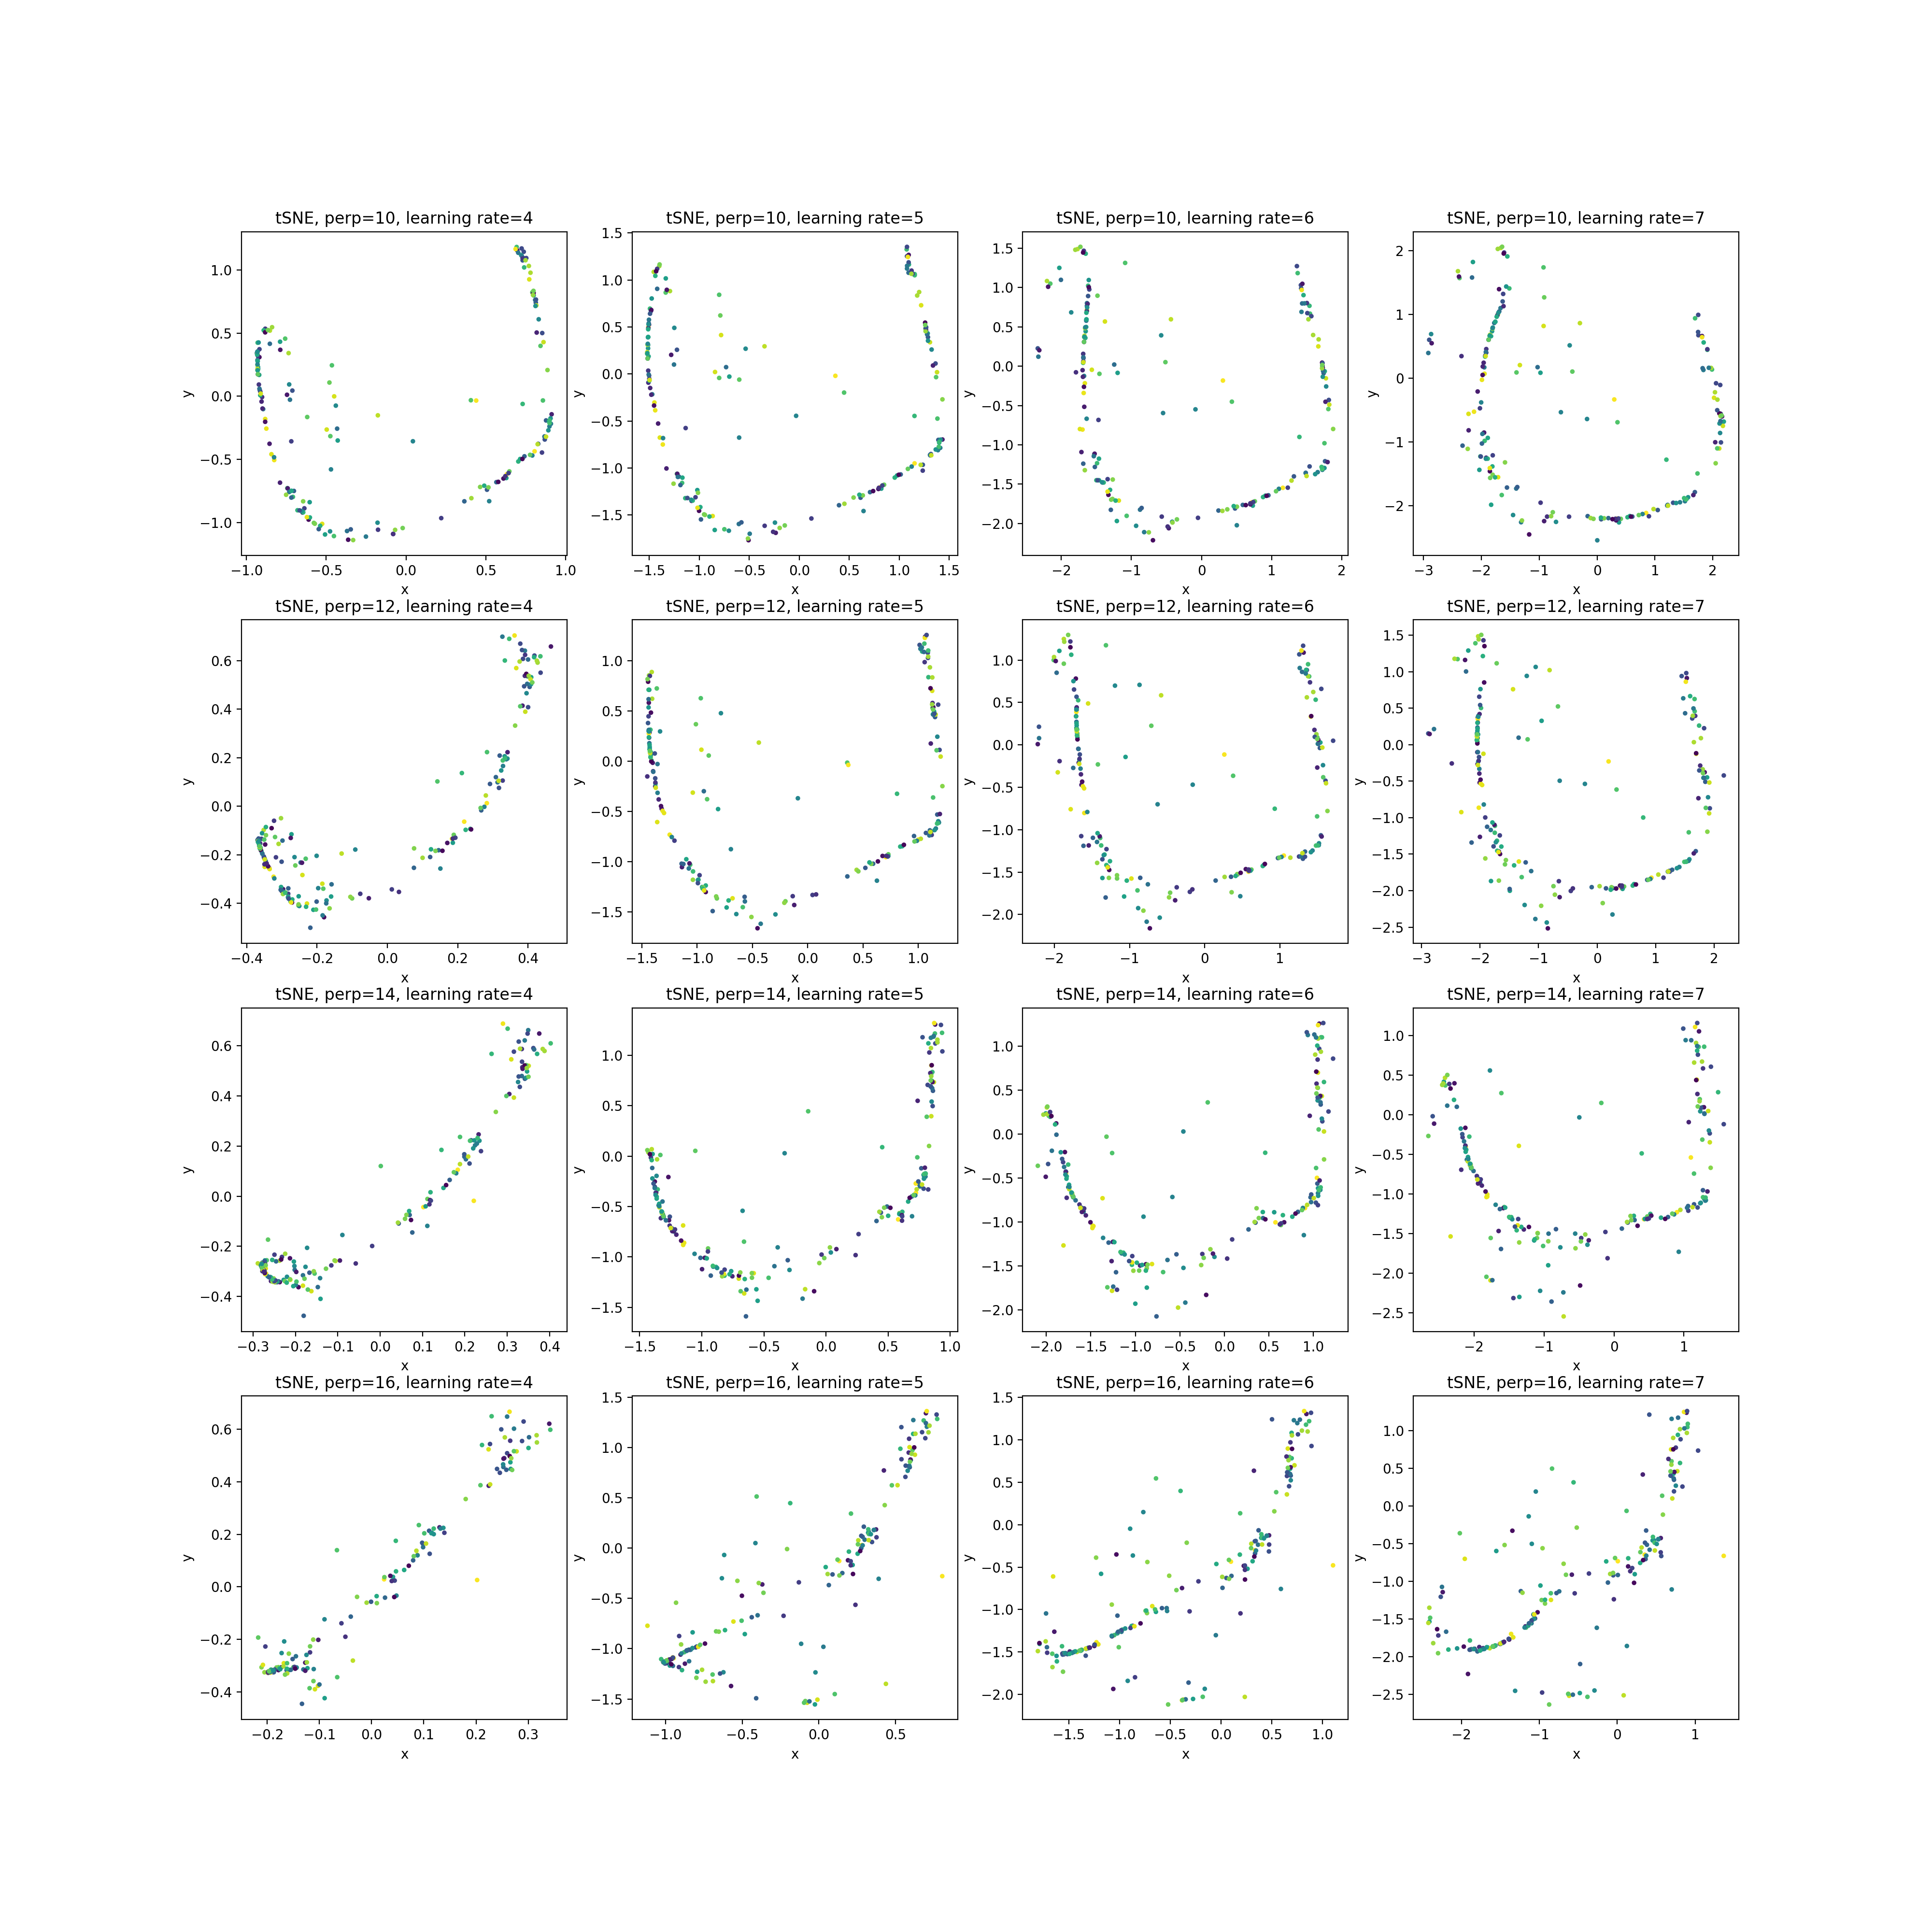

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3


In [18]:
# now run the same analysis for different values of perplexity and learning rate
from sklearn.manifold import TSNE

prep_list = [10, 12, 14, 16]
learning_rate = [4, 5, 6, 7]
plt.figure()
plt.rcParams['figure.figsize'] = 20, 20

count = 1
for p, prep_val in enumerate(prep_list):
    for l, learn_val in enumerate(learning_rate):
        print(p, l)
        
        result = TSNE(perplexity=prep_val, learning_rate=learn_val, metric='euclidean', n_components=2, random_state=1).fit_transform(X_SG)
        x = result[:, 0]
        y = result[:, 1]
        plt.subplot(4, 4, count)
        plt.title("tSNE, perp=%s, learning rate=%s" % (prep_val, learn_val))
        plt.scatter(x, y, c = indicies, s=6)
        plt.xlabel("x")
        plt.ylabel("y")
        
        count += 1
        
#plt.tight_layout()
plt.show()